In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn as sns
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.linear_model import LinearRegression,LogisticRegression




In [4]:
#reading dataset
df=pd.read_csv('heart.csv')
df.head()
df.drop(['target','cp','thal','exang','slope'],axis=1)


,age,sex,trestbps,chol,fbs,restecg,thalach,oldpeak,ca
0,52,1,125,212,0,1,168,1.0,2
1,53,1,140,203,1,0,155,3.1,0
2,70,1,145,174,0,1,125,2.6,0
3,61,1,148,203,0,1,161,0.0,1
4,62,0,138,294,1,1,106,1.9,3
...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,1,164,0.0,0
1021,60,1,125,258,0,0,141,2.8,1
1022,47,1,110,275,0,0,118,1.0,1
1023,50,0,110,254,0,0,159,0.0,0


In [22]:
#splitting dataset into test and train
X=np.asarray(df[['age','sex','trestbps','chol','fbs','restecg','thalach','ca']])
y=np.asarray(df['oldpeak'])
#data normaliztion
X=preprocessing.StandardScaler().fit(X).transform(X)

In [10]:
#train and testsplit
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (717, 8) (717,)
Test set: (308, 8) (308,)


In [11]:
cvd_reg=LinearRegression()
cvd_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
for label in df.columns[1:]:
    plt.scatter(df[label],df['oldpeak'])
  

    plt.title(label)
    plt.ylabel("cvd_possibility")
    plt.xlabel(label)
    plt.show()


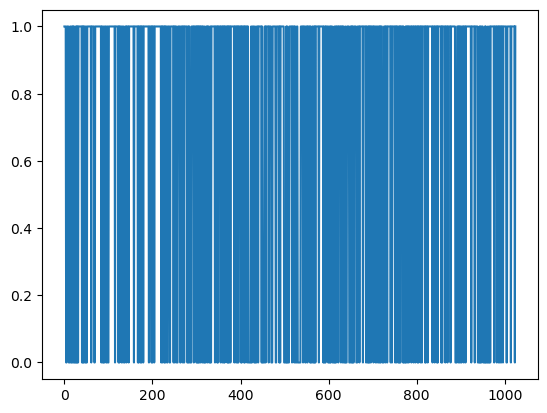

In [20]:
laste=df['sex'].plot()
plt.show(laste)

In [ ]:
#fitting logistic regression for prediciton
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

In [ ]:
#evaluating accuracy
from sklearn.metrics import accuracy_score
print('the model is: ', accuracy_score(y_test, y_pred))

In [ ]:
#training